We are going to see now how we are able to create other graphs
https://kieranhealy.org/blog/archives/2018/12/04/heatmaps-of-mortality-rates/

BOOK: https://kieranhealy.org/

DATA: https://www.mortality.org/

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import math

import matplotlib.pyplot as plt

import seaborn as sns

In [8]:
lex = pd.read_table("Mx_1x1.txt", skiprows=2, sep='\s+', na_values=".")

In [9]:
lex.head()

,Year,Age,Female,Male,Total
0,1816,0,0.186986,0.222931,0.205344
1,1816,1,0.046702,0.046670,0.046685
2,1816,2,0.033928,0.034306,0.034120
3,1816,3,0.022912,0.023155,0.023035
4,1816,4,0.015995,0.016075,0.016035


In [10]:
# Set the 110+ == 110
lex.loc[lex['Age'] == '110+', 'Age'] = 110 

In [11]:
lex['Age'] = pd.to_numeric(lex['Age']) # need to be a real number

In [12]:
# Need to crete a new form for the dataframes
# Pivot table
mortality_grid = pd.pivot_table(data=lex[lex['Age'] <= 100], 
                                index='Age',
                                columns='Year',
                                values='Male')
mortality_grid.shape

(101, 203)

In [13]:
mortality_grid.head(5)

Year,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Age,,,,,,,,,,,,,,,,,,,,,
0,0.222931,0.217954,0.216629,0.234458,0.213029,0.213841,0.241128,0.221829,0.234507,0.223781,...,0.004172,0.003931,0.003639,0.003808,0.003926,0.003802,0.003989,0.003975,0.004057,0.004199
1,0.046670,0.053905,0.061260,0.066978,0.058200,0.056375,0.059970,0.058001,0.062447,0.064879,...,0.000321,0.000262,0.000287,0.000313,0.000277,0.000288,0.000288,0.000212,0.000284,0.000283
2,0.034306,0.038601,0.041421,0.046210,0.040766,0.041691,0.042485,0.039162,0.043943,0.045941,...,0.000233,0.000198,0.000175,0.000201,0.000184,0.000153,0.000191,0.000211,0.000168,0.000185
3,0.023155,0.027090,0.028248,0.030090,0.027286,0.028215,0.029681,0.026570,0.028650,0.030954,...,0.000172,0.000151,0.000116,0.000136,0.000152,0.000130,0.000157,0.000151,0.000124,0.000111
4,0.016075,0.018917,0.020125,0.021382,0.018908,0.019647,0.020692,0.019115,0.020021,0.021067,...,0.000097,0.000093,0.000115,0.000127,0.000127,0.000118,0.000112,0.000108,0.000084,0.000129


In [14]:
mortality_grid.tail(5)

Year,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Age,,,,,,,,,,,,,,,,,,,,,
96,0.353281,0.391148,0.311865,0.375152,0.379127,0.321904,0.359317,0.378642,0.358133,0.396581,...,0.332915,0.344610,0.325963,0.348499,0.322989,0.307823,0.333270,0.328522,0.325448,0.320921
97,0.377493,0.450635,0.357256,0.433953,0.447469,0.382162,0.394729,0.441490,0.392197,0.456061,...,0.367392,0.365363,0.348401,0.382503,0.379017,0.349941,0.356081,0.362166,0.352322,0.347914
98,0.407527,0.517080,0.433014,0.517852,0.537518,0.471528,0.449547,0.510380,0.428021,0.522651,...,0.392359,0.393325,0.391146,0.419298,0.393131,0.378947,0.399991,0.398953,0.389651,0.372345
99,0.451876,0.610657,0.545001,0.652396,0.680141,0.584112,0.552438,0.600798,0.475392,0.600765,...,0.483295,0.426185,0.443335,0.461962,0.417816,0.399308,0.444095,0.475451,0.418018,0.443265
100,0.387128,0.502182,0.582325,0.476503,0.535256,0.343834,0.437913,0.301182,0.395120,0.469188,...,0.436962,0.467004,0.444555,0.524661,0.449398,0.436077,0.459998,0.497475,0.424684,0.461986


In [15]:
# In order to be able to use these data for graphs
# Need to change the deathrate to be in range of 1-100
# ntile comes from SQL and was inherited by R and Python
def ntile(x, n):
    return np.floor(n * (rankdata(x, method='ordinal') - 1) / len(x)) + 1

In [16]:
# Example
x = [5, 1, 3, 2, 2]
print(x)
ntile(x, 2)

[5, 1, 3, 2, 2]


array([2., 1., 2., 1., 1.])

In [17]:
# We need to use ntile for both rows and column
dims  = mortality_grid.shape
print(dims)
mortality_grid_binned = ntile(mortality_grid.values.ravel(), 100).reshape(dims)
print(mortality_grid_binned.min(), mortality_grid_binned.max())
mortality_grid_binned

(101, 203)
1.0 100.0


array([[85., 85., 85., ..., 19., 19., 20.],
       [67., 69., 71., ...,  2.,  3.,  3.],
       [63., 64., 65., ...,  2.,  2.,  2.],
       ...,
       [95., 98., 96., ..., 95., 94., 94.],
       [97., 99., 99., ..., 97., 96., 96.],
       [94., 98., 99., ..., 98., 96., 97.]])

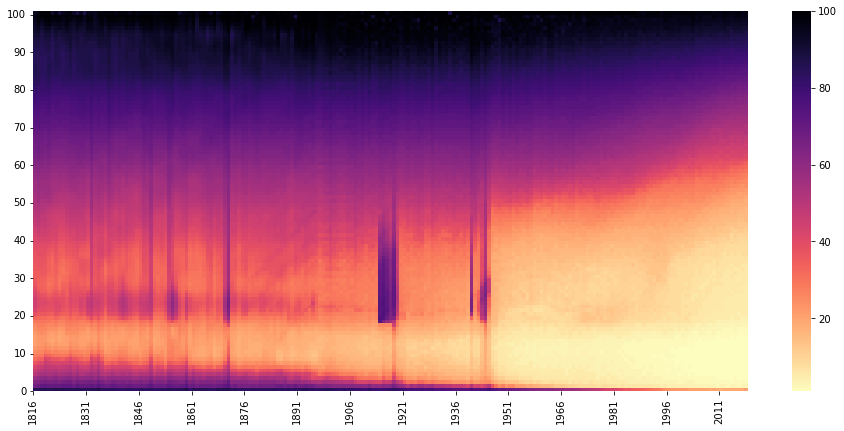

In [18]:
# In order to display the data we will use heatmap using seaborn
fig = plt.figure(figsize=(16, 7))
ax = fig.gca()
sns.heatmap(data=mortality_grid_binned,
            cmap='magma_r',
            cbar=True,
            ax=ax)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 200, 15))
ax.set_xticklabels(np.arange(1816, 2017, 15))
ax.invert_yaxis()

The above graph shows a lot of infromation regarding mortality in France.
You can see the World War effects as well as other information

In [19]:
# We can then create a function to be able to observe all the heatmaps for any country
def lex_heatmap(country, data_file, sex, width, height):
    
    lex = pd.read_table(data_file, skiprows=2, sep='\s+', na_values=".")
    lex.loc[lex['Age'] == '110+', 'Age'] = 110
    lex['Age'] = pd.to_numeric(lex['Age'])
    mortality_grid = pd.pivot_table(data=lex[lex['Age'] <= 100], 
                                    index='Age',
                                    columns='Year',
                                    values=sex)
    dims  = mortality_grid.shape
    mortality_grid_binned = ntile(mortality_grid.values.ravel(), 100).reshape(dims)
    fig = plt.figure(figsize=(width, height))
    ax = fig.gca()
    sns.heatmap(data=mortality_grid_binned,
            cmap='magma_r',
            cbar=True,
            ax=ax)
    min_x = mortality_grid.columns.min()
    max_x = mortality_grid.columns.max()
    min_x_label = math.ceil(min_x/5) * 5
    max_x_label = math.floor(max_x/5) * 5
    xtick_labels = np.arange(min_x_label, max_x_label+1, 15)
    xticks = xtick_labels - min_x
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Year', size=16)
    ax.set_ylabel('Age', size=16)
    title = ax.set_title(f'{country}: {sex} {min_x}-{max_x}', size=16)
    title.set_position([0.5, 1.05])
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_yticklabels(np.arange(0, 101, 10), rotation=0)
    return mortality_grid

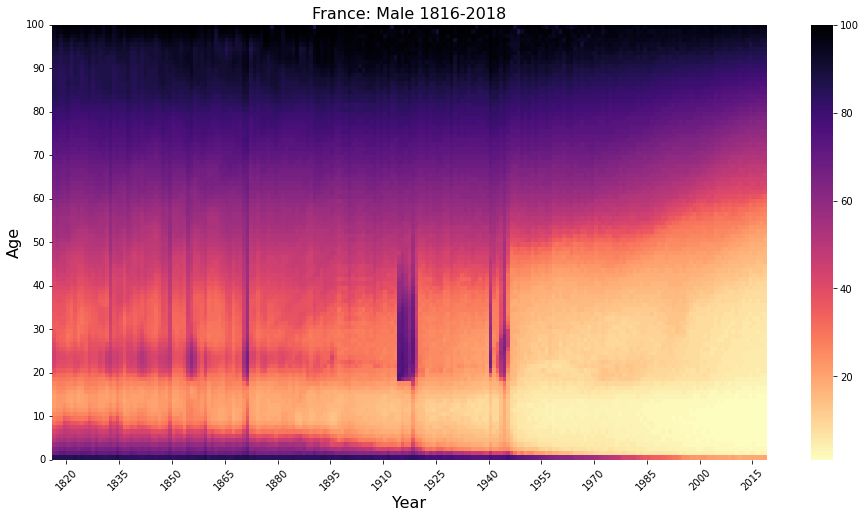

In [20]:
# Male
_ = lex_heatmap('France', 'Mx_1x1.txt', 'Male', 16, 8)

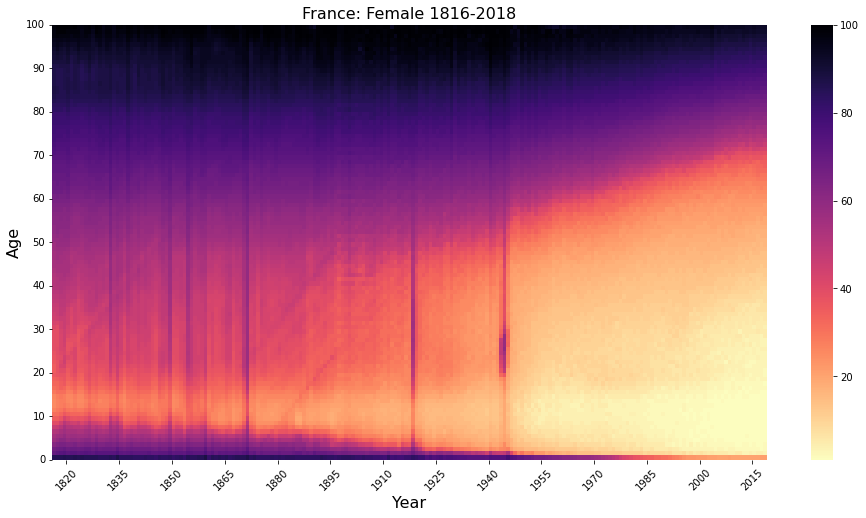

In [21]:
# Female
_ = lex_heatmap('France', 'Mx_1x1.txt', 'Female', 16, 8)

We can see that is some deeper color place around 1918.
This is because of the 1918 flue [SPANISH FLUE]

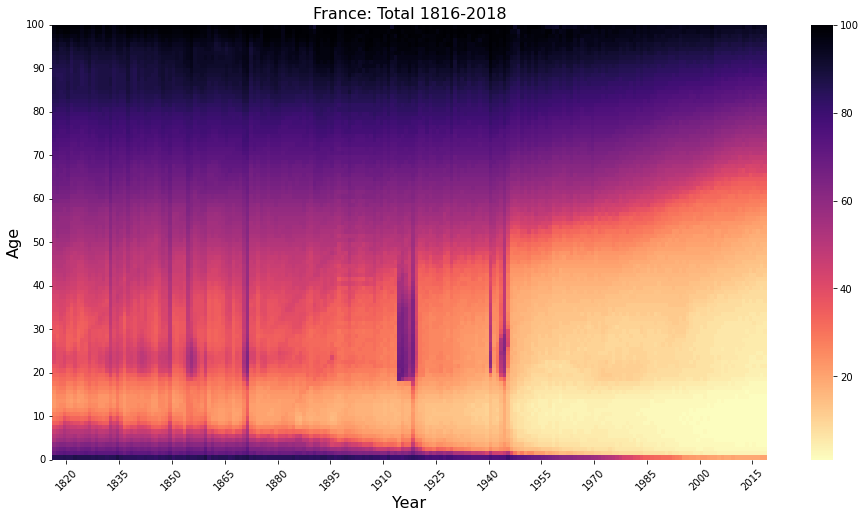

In [22]:
# Total
_ = lex_heatmap('France', 'Mx_1x1.txt', 'Total', 16, 8)

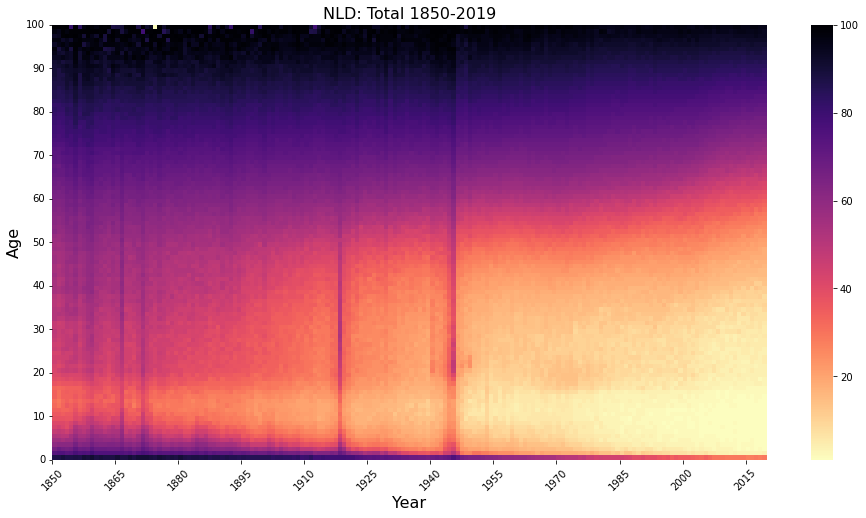

In [25]:
 _ = lex_heatmap('NLD', 'NLD.Mx_1x1.txt', 'Total', 16, 8)

We can also import any country form the death_rate folder

In [26]:
lex = pd.read_table("NLD.Mx_1x1.txt", skiprows=2, sep='\s+', na_values=".")

In [29]:
lex.tail()

,Year,Age,Female,Male,Total
18865,2019,106,0.708861,1.385705,0.766349
18866,2019,107,0.779246,2.717839,0.871544
18867,2019,108,0.901401,5.768455,0.977354
18868,2019,109,1.347922,NaN,1.347922
18869,2019,110+,5.814632,NaN,5.814632
